In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode
plt.style.use('seaborn-whitegrid')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
data = pd.read_csv("fire_nrt_V1_96617.csv")

#Task 1: Density Plots (50 points)
### 1.1 Plot the longitude vs latitude several ways within a single figure (each in its own axes):
1. Using the matplotlib defaults.
2. Adjusting alpha and marker size to compensate for overplotting.
3. Using a hexbin plot.
4. Subsampling the dataset.

For each but the first one, ensure that all the plotting area is used in a reasonable way and that
as much information as possible is conveyed; this is somewhat subjective and there is no one
right answer. [45 pts]
### 1.2 In what areas are most of the anomalies (measurements) located? [5pts]

In [3]:
data.sample(7)

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,daynight
704916,-28.29962,129.27026,367.0,0.42,0.45,2019-12-25,530,N,VIIRS,l,1.0NRT,333.5,69.4,D
31305,-12.22674,135.39058,332.2,0.51,0.49,2019-10-08,454,N,VIIRS,n,1.0NRT,297.9,6.5,D
899333,-37.06906,147.39804,367.0,0.38,0.36,2020-01-04,400,N,VIIRS,h,1.0NRT,331.0,123.7,D
242497,-31.19801,152.42882,336.0,0.53,0.42,2019-11-12,354,N,VIIRS,n,1.0NRT,300.4,10.1,D
655659,-33.87022,150.17801,330.2,0.38,0.36,2019-12-20,1500,N,VIIRS,n,1.0NRT,293.0,1.1,N
834349,-37.73683,148.26872,301.7,0.40,0.45,2020-01-01,1436,N,VIIRS,n,1.0NRT,284.6,0.9,N
244158,-12.91945,143.23729,347.9,0.39,0.36,2019-11-12,400,N,VIIRS,n,1.0NRT,306.1,11.7,D


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956257 entries, 0 to 956256
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   latitude    956257 non-null  float64
 1   longitude   956257 non-null  float64
 2   bright_ti4  956257 non-null  float64
 3   scan        956257 non-null  float64
 4   track       956257 non-null  float64
 5   acq_date    956257 non-null  object 
 6   acq_time    956257 non-null  int64  
 7   satellite   956257 non-null  object 
 8   instrument  956257 non-null  object 
 9   confidence  956257 non-null  object 
 10  version     956257 non-null  object 
 11  bright_ti5  956257 non-null  float64
 12  frp         956257 non-null  float64
 13  daynight    956257 non-null  object 
dtypes: float64(7), int64(1), object(6)
memory usage: 102.1+ MB


## Using the matplotlib defaults.

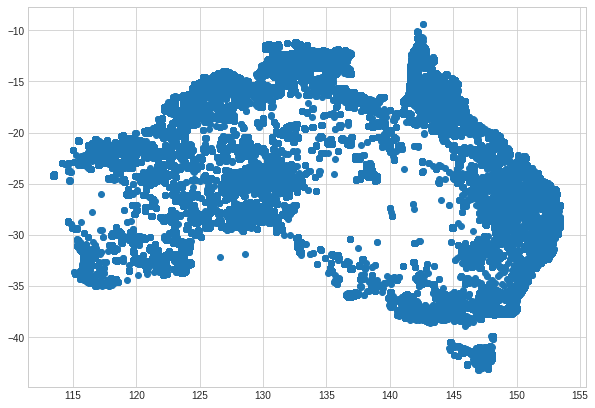

In [5]:
fig, ax = plt.subplots(figsize = (10,7))

ax.scatter(data.longitude, data.latitude);


## Adjusting alpha and marker size to compensate for overplotting.

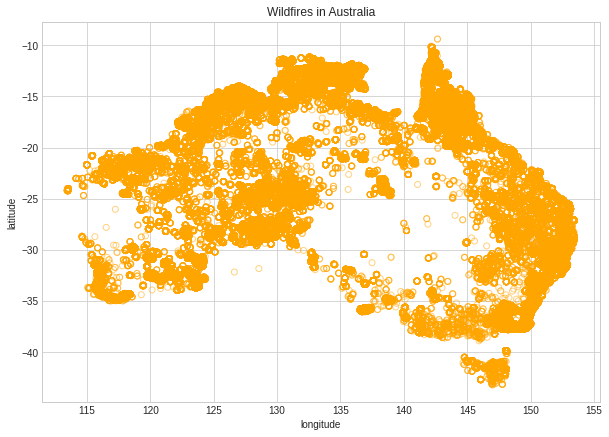

In [6]:
fig, ax = plt.subplots(figsize = (10,7))

ax.scatter(data.longitude, data.latitude, alpha = .5, facecolors = 'none', edgecolor = 'orange')
ax.set_ylabel("latitude")
ax.set_xlabel("longitude")
ax.set_title("Wildfires in Australia");

## Using a hexbin plot.

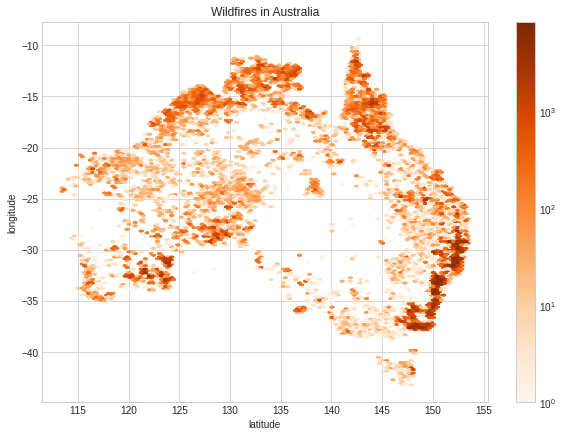

In [7]:
fig, ax = plt.subplots(figsize = (10,7))

mapable = ax.hexbin(data.longitude, data.latitude, cmap = 'Oranges',gridsize=(100,100), bins = "log", mincnt = 1)
ax.set_xlabel("latitude")
ax.set_ylabel("longitude")
ax.set_title("Wildfires in Australia")
fig.colorbar(mapable);

## Subsampling the dataset.

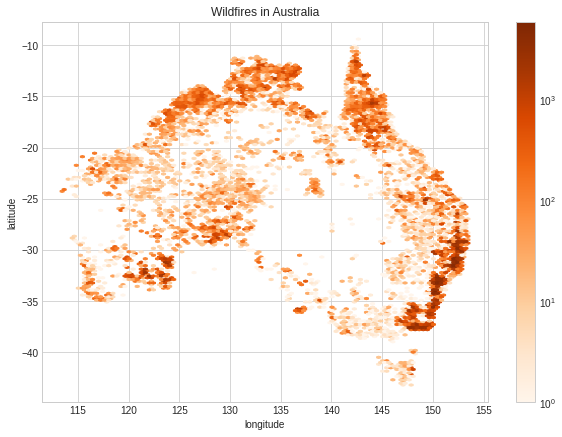

In [8]:
fig, ax = plt.subplots(figsize = (10,7))

p = .7

sample = data.sample(int(p*data.shape[0]))

mapable = ax.hexbin(sample.longitude, sample.latitude, cmap = "Oranges",gridsize=(100,100), bins = "log", mincnt = 1)
ax.set_ylabel("latitude")
ax.set_xlabel("longitude")
ax.set_title("Wildfires in Australia")
fig.colorbar(mapable);

# Task 2: Visualizing class membership (50 points)
### Visualize the distribution of Brightness temperature I-4 as a histogram (with appropriatesettings). Let’s assume we are certain of a fire if the value of temperature I-4 is saturated as visible from the histogram.
### 2.1 Do a small multiples plot of whether the brightness is saturated, i.e. do one plot of lat vs long for those points with brightness saturated and a separate for those who are not (within the same figure on separate axes). You can pick any of the methods from 1.1 that you find mostsuitable. Can you spot differences in the distributions? [20 pts]
### 2.2 Plot both groups in the same axes with different colors. Try changing the order of plotting the two classes (i.e. draw the saturated first then the non-saturated or the other way around). Make sure to include a legend. How does that impact the result? [20 pts]

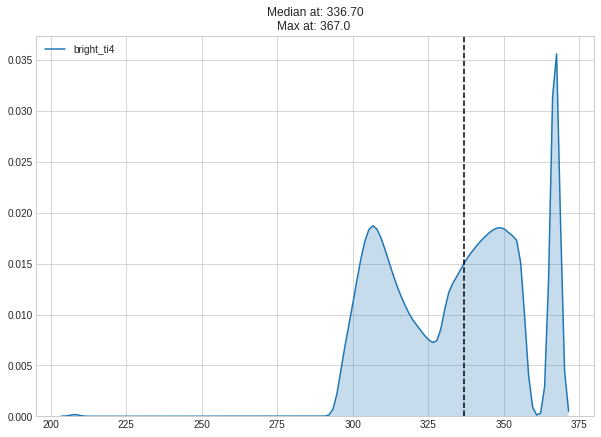

In [9]:
fig, ax = plt.subplots(figsize = (10,7))
median_ = np.median(data.bright_ti4)
max_ = max(data.bright_ti4)
sns.kdeplot(data.bright_ti4, shade = True, ax = ax)
ax.set_title("Median at: {:.2f}\nMax at: {} ".format(median_,max_))
ax.axvline(median_, linestyle = "--", color = "black");

### We are goint to define as saturated those cases in which the maximum number was reached 367

### 2.1 Do a small multiples plot of whether the brightness is saturated, i.e. do one plot of lat vs long for those points with brightness saturated and a separate for those who are not (within the same figure on separate axes). You can pick any of the methods from 1.1 that you find mostsuitable. Can you spot differences in the distributions?

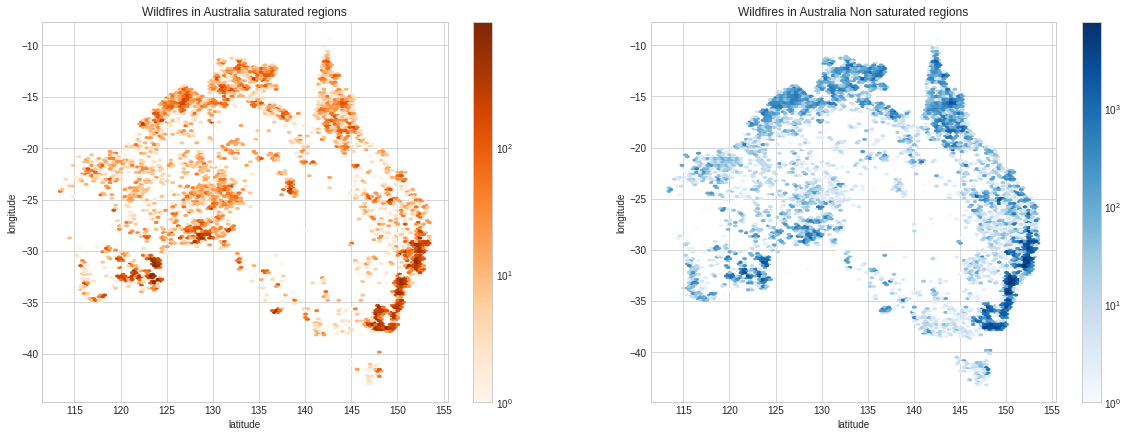

In [10]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20,7))

saturated = ax[0].hexbin(data[data.bright_ti4 == max_].longitude, data[data.bright_ti4 == max_].latitude, cmap = 'Oranges',gridsize=(100,100), bins = "log", mincnt = 1)
ax[0].set_xlabel("latitude")
ax[0].set_ylabel("longitude")
ax[0].set_title("Wildfires in Australia saturated regions")
fig.colorbar(saturated, ax = ax[0])

non_saturated = ax[1].hexbin(data[data.bright_ti4 < max_].longitude, data[data.bright_ti4 < max_].latitude, cmap = 'Blues',gridsize=(100,100), bins = "log", mincnt = 1)
ax[1].set_xlabel("latitude")
ax[1].set_ylabel("longitude")
ax[1].set_title("Wildfires in Australia Non saturated regions")
fig.colorbar(non_saturated, ax = ax[1]);

### 2.2 Plot both groups in the same axes with different colors. Try changing the order of plotting the two classes (i.e. draw the saturated first then the non-saturated or the other way around). Make sure to include a legend. How does that impact the result?

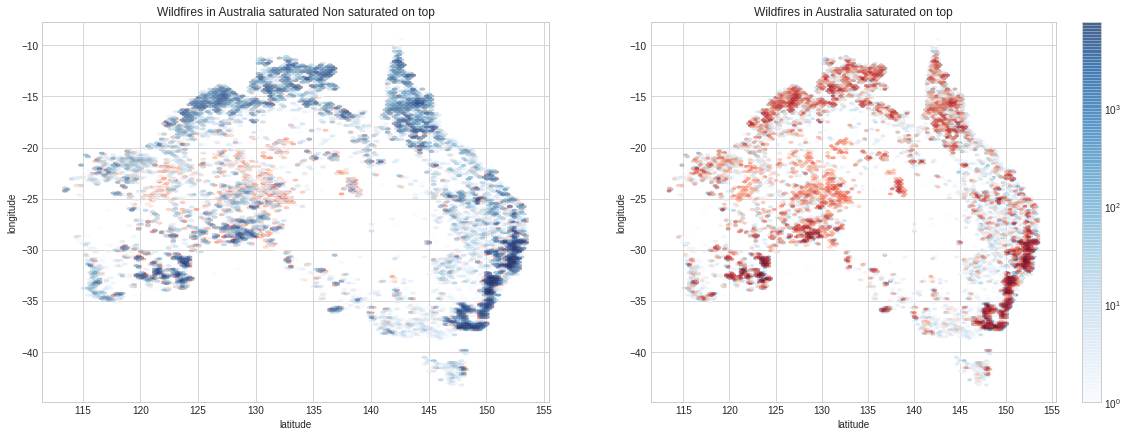

In [11]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20,7))

saturated = ax[0].hexbin(data[data.bright_ti4 == max_].longitude, data[data.bright_ti4 == max_].latitude, cmap = 'Reds',gridsize=(100,100), bins = "log", mincnt = 1, alpha = .5, label = "Saturated")
non_saturated = ax[0].hexbin(data[data.bright_ti4 < max_].longitude, data[data.bright_ti4 < max_].latitude, cmap = 'Blues',gridsize=(100,100), bins = "log", mincnt = 1, alpha = .5, label = "Non saturated")
ax[0].set_xlabel("latitude")
ax[0].set_ylabel("longitude")
ax[0].set_title("Wildfires in Australia saturated Non saturated on top")


non_saturated = ax[1].hexbin(data[data.bright_ti4 < max_].longitude, data[data.bright_ti4 < max_].latitude, cmap = 'Blues',gridsize=(100,100), bins = "log", mincnt = 1, alpha = .5, label = "Non saturated")
saturated = ax[1].hexbin(data[data.bright_ti4 == max_].longitude, data[data.bright_ti4 == max_].latitude, cmap = 'Reds',gridsize=(100,100), bins = "log", mincnt = 1, alpha = .5, label = "Saturated")
ax[1].set_xlabel("latitude")
ax[1].set_ylabel("longitude")
ax[1].set_title("Wildfires in Australia saturated on top")
fig.colorbar(non_saturated, ax = ax[1]);